In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("./training.1600000.processed.noemoticon.csv",header=None, names=cols)
df.drop(['id', 'date', 'query_string', 'user'], axis=1, inplace=True)

In [3]:
df['pre_clean_len'] = [len(t) for t in df.text]
print("Average tweet length pre-cleaning:", np.average(df['pre_clean_len']), "characters.")

Average tweet length pre-cleaning: 74.041768125 characters.


In [4]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re

STOPWORDS = stopwords.words('english')

def text_cleaner(text, remove_stopwords=True):
    temp = BeautifulSoup(text, 'lxml').get_text() # removes html encoding
    temp.replace("'", "") # avoids removing contractions
    temp = temp.lower() # lowercase
    temp = re.sub(r'@[A-Za-z0-9_]+', '', temp) # removes mentions
    temp = re.sub(r'https?://\S+', '', temp) # removes urls (http/https)
    temp = re.sub(r'www.\S+', '', temp) # removes urls (www.)
    temp = re.sub(r'[&,.]', ' ', temp) # removes all non letters
    temp = re.sub(r'[^a-z\s]+', '', temp)
    # tokenizes and removes stopwords
    temp = temp.split()
    if remove_stopwords: temp = [w for w in temp if w not in STOPWORDS]
    cleaned = " ".join(word for word in temp)
    cleaned = cleaned.strip()
    return cleaned

clean_tweets = []
clean_tweets_no_stopwords = []

for i in range(len(df)):
    if ((i+1)%10000 == 0): print("%d tweets have been cleaned" % (i+1))
    
    clean_tweet = text_cleaner(df.text[i], remove_stopwords=False)
    clean_tweet_no_stopwords = text_cleaner(df.text[i])
    
    clean_tweets.append(clean_tweet)
    clean_tweets_no_stopwords.append(clean_tweet_no_stopwords)

c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


10000 tweets have been cleaned
20000 tweets have been cleaned
30000 tweets have been cleaned
40000 tweets have been cleaned
50000 tweets have been cleaned
60000 tweets have been cleaned
70000 tweets have been cleaned
80000 tweets have been cleaned
90000 tweets have been cleaned
100000 tweets have been cleaned
110000 tweets have been cleaned
120000 tweets have been cleaned
130000 tweets have been cleaned
140000 tweets have been cleaned
150000 tweets have been cleaned
160000 tweets have been cleaned
170000 tweets have been cleaned
180000 tweets have been cleaned
190000 tweets have been cleaned
200000 tweets have been cleaned
210000 tweets have been cleaned
220000 tweets have been cleaned
230000 tweets have been cleaned
240000 tweets have been cleaned
250000 tweets have been cleaned
260000 tweets have been cleaned
270000 tweets have been cleaned
280000 tweets have been cleaned
290000 tweets have been cleaned
300000 tweets have been cleaned
310000 tweets have been cleaned
320000 tweets hav

In [21]:
# creating new DataFrames and dropping null entries (which have occurred due to cleaning) to get cleaned training set
clean_df = pd.DataFrame(clean_tweets, columns=['clean_text'])
clean_no_stopwords_df = pd.DataFrame(clean_tweets_no_stopwords, columns=['clean_text'])

clean_df['target'] = df.sentiment
clean_no_stopwords_df['target'] = df.sentiment

clean_df = clean_df[clean_df['clean_text'] != '']
clean_no_stopwords_df = clean_no_stopwords_df[clean_no_stopwords_df['clean_text'] != '']

clean_df.reset_index(drop=True, inplace=True)
clean_no_stopwords_df.reset_index(drop=True, inplace=True)

clean_df.info()
clean_no_stopwords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596243 entries, 0 to 1596242
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   clean_text  1596243 non-null  object
 1   target      1596243 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592108 entries, 0 to 1592107
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   clean_text  1592108 non-null  object
 1   target      1592108 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.3+ MB


In [22]:
clean_df.to_csv('clean_tweets_with_stopwords.csv', encoding='utf-8')
clean_no_stopwords_df.to_csv('clean_tweets.csv', encoding='utf-8')

Validation result for 10000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 79.17%
model is 28.58 % more accurate than null accuracy
train and test time: 74.97s
--------------------------------------------------------------------------------
Validation result for 20000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 79.56%
model is 28.97 % more accurate than null accuracy
train and test time: 92.31s
--------------------------------------------------------------------------------
Validation result for 30000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 79.78%
model is 29.19 % more accurate than null accuracy
train and test time: 83.53s
--------------------------------------------------------------------------------
Validation result for 40000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 79.91%
model is 29.31 % more accurate than null accuracy
train and test time: 81.94s
--------------------------------------------------------------------------------
Validation result for 50000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.13%
model is 29.53 % more accurate than null accuracy
train and test time: 83.61s
--------------------------------------------------------------------------------
Validation result for 60000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.06%
model is 29.46 % more accurate than null accuracy
train and test time: 81.35s
--------------------------------------------------------------------------------
Validation result for 70000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.28%
model is 29.69 % more accurate than null accuracy
train and test time: 77.25s
--------------------------------------------------------------------------------
Validation result for 80000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.05%
model is 29.46 % more accurate than null accuracy
train and test time: 76.97s
--------------------------------------------------------------------------------
Validation result for 90000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.21%
model is 29.61 % more accurate than null accuracy
train and test time: 78.89s
--------------------------------------------------------------------------------
Validation result for 100000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.25%
model is 29.65 % more accurate than null accuracy
train and test time: 80.28s
--------------------------------------------------------------------------------


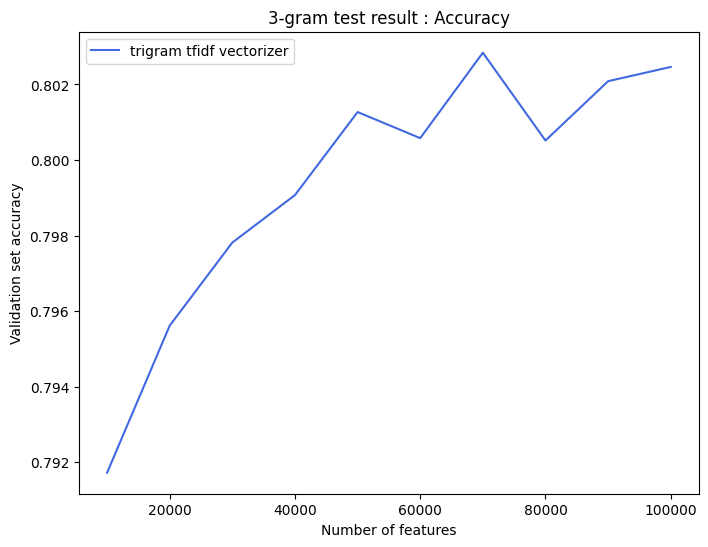

In [5]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

my_df = pd.read_csv('clean_tweets.csv', index_col=0)
x = my_df.clean_text
y = my_df.target
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=42)

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    null_accuracy = len(x_test[y_test == 0])/len(x_test) if len(x_test[y_test == 0])/len(x_test) > 0.5 else 1 - len(x_test[y_test == 0])/len(x_test)
    
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    
    if accuracy > null_accuracy:
        print("model is {0:.2f} % more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    
    return accuracy, train_test_time

# cvec = CountVectorizer()
tvec = TfidfVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []

    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    
    return result

feature_result_tgt = nfeature_accuracy_checker(ngram_range=(1, 3))

nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.title("3-gram test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [24]:
# Hyperparameter tuning: training a model with 70000 features, as this was the best performing classifier last time
model_df = pd.read_csv('clean_tweets.csv', index_col=0)
x_model = model_df.clean_text
y_model = model_df.target
x_train_model, x_validation_and_test_model, y_train_model, y_validation_and_test_model = train_test_split(x_model, y_model, test_size=.02, random_state=42)
x_validation_model, x_test_model, y_validation_model, y_test_model = train_test_split(x_validation_and_test_model, y_validation_and_test_model, test_size=.5, random_state=42)

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    null_accuracy = len(x_test[y_test == 0])/len(x_test) if len(x_test[y_test == 0])/len(x_test) > 0.5 else 1 - len(x_test[y_test == 0])/len(x_test)
    
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    
    if accuracy > null_accuracy:
        print("model is {0:.2f} % more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    
    return accuracy, train_test_time

tvec_model = TfidfVectorizer()
lr_model = LogisticRegression(max_iter=10000)

tvec.set_params(stop_words=None, max_features=70000, ngram_range=(1,3))
checker_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', lr)
])

print("Validation result for {} features".format(70000))
nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train_model, y_train_model, x_validation_model, y_validation_model)

Validation result for 70000 features
null accuracy: 50.59%
accuracy score: 64.35%
model is 13.76 % more accurate than null accuracy
train and test time: 159.85s
--------------------------------------------------------------------------------


In [26]:
from sklearn.linear_model import SGDClassifier

model_df = pd.read_csv('clean_tweets.csv', index_col=0)
x_model = model_df.clean_text
y_model = model_df.target
x_train_model, x_validation_and_test_model, y_train_model, y_validation_and_test_model = train_test_split(x_model, y_model, test_size=.02, random_state=42)
x_validation_model, x_test_model, y_validation_model, y_test_model = train_test_split(x_validation_and_test_model, y_validation_and_test_model, test_size=.5, random_state=42)

clf = SGDClassifier()
tvec_model = TfidfVectorizer()
tvec.set_params(stop_words=None, max_features=100000, ngram_range=(1,3))

checker_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', clf)
])

print("Validation result for {} features".format(70000))
nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train_model, y_train_model, x_validation_model, y_validation_model)

Validation result for 70000 features
null accuracy: 50.59%
accuracy score: 77.36%
model is 26.76 % more accurate than null accuracy
train and test time: 83.61s
--------------------------------------------------------------------------------


In [1]:
import tweepy
import os
from dotenv import load_dotenv

load_dotenv()

consumer_key = os.getenv('API_KEY')
consumer_secret = os.getenv('API_KEY_SECRET')
access_token = os.getenv('ACCESS_TOKEN')
access_token_secret = os.getenv('ACCESS_TOKEN_SECRET')
bearer_token = os.getenv('BEARER_TOKEN')

client = tweepy.Client(bearer_token)
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth,wait_on_rate_limit=True)
# api = tweepy.API(auth)

search_word = 'tesla' 
date_since = '2023-01-01'

# tweets = tweepy.search_recent_tweets(api.search_tweets, q = search_word, lang ='en', since = date_since).items(100)
tweets = client.search_recent_tweets(query=search_word)
# tweet_details = [[tweet.geo,tweet.text,tweet.user.screen_name,tweet.user.location] for tweet in tweets]
# tweet_details = [tweet.text for tweet in tweets]
for tweet in tweets.data:
    print(tweet.text)

# corona_tweets = tweepy.Cursor(api.search,q = "Covid19 OR corona OR Coronavirus -filter:retweets",lang = "en", show_user = True,tweet_mode="extended").items(5000)
# corona_tweets_list = [[tweet.created_at, tweet.place, tweet.user.name, tweet.full_text] for tweet in corona_tweets]
# print(len(corona_tweets_list))

RT @elonmusk: Wait for it …
@borentar @11thJeff @elonmusk Sick lies require strong language, Law of Nature. Why would you complain about "strong language" but not complaining lies meant to damage Tesla &amp; Elon?
RT @gurgavin: $TSLA TESLA Q1 DELIVERY NUMBERS WILL BE OUT IN LESS THAN 24 HOURS 

ANALYST ESTIMATES 

TOTAL DELIVERIES -&gt;  421,164

MODEL S…
@Tesla https://t.co/uAdA36ltjl
RT @elonmusk: Wait for it …
@Tesla April Fools!
@elonmusk Yeah, it can stop before colliding with an obstacle, how does it fair when the obstacle doesn't stop? Say an oncoming Tesla that crosses into the opposite lane due to avoiding a deer in the road?
RT @StockMKTNewz: Best performing S&amp;P 500 stocks from Q1

Nvidia $NVDA +90.1%
Facebook $META +76.1%
Tesla $TSLA +68.4%
Warner Bros. Discove…
RT @elonmusk: Wait for it …
😂 https://t.co/c7bIQmPCGY


In [5]:
# def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
#     null_accuracy = len(x_test[y_test == 0])/len(x_test) if len(x_test[y_test == 0])/len(x_test) > 0.5 else 1 - len(x_test[y_test == 0])/len(x_test)
#     # if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
#     #     null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
#     # else:
#     #     null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
#     t0 = time()
#     sentiment_fit = pipeline.fit(x_train, y_train)
#     y_pred = sentiment_fit.predict(x_test)
#     train_test_time = time() - t0
#     accuracy = accuracy_score(y_test, y_pred)
#     print("null accuracy: {0:.2f}%".format(null_accuracy*100))
#     print("accuracy score: {0:.2f}%".format(accuracy*100))
#     if accuracy > null_accuracy:
#         print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
#     elif accuracy == null_accuracy:
#         print("model has the same accuracy with the null accuracy")
#     else:
#         print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
#     print("train and test time: {0:.2f}s".format(train_test_time))
#     print("-"*80)
#     return accuracy, train_test_time

# def nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
#     result = []
#     print(classifier, "\n")
#     for n in n_features:
#         vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
#         checker_pipeline = Pipeline([
#             ('vectorizer', vectorizer),
#             ('classifier', classifier)
#         ])
#         print("Validation result for {} features".format(n))
#         nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
#         result.append((n,nfeature_accuracy,tt_time))
#     return result

def sentiment_analyzer_maker(vectorizer, num_features, ngram_range, classifier, train_df):
    vectorizer.set_params(max_features=num_features, ngram_range=ngram_range)
    sentiment_analyzer = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])
    sentiment_analyzer = sentiment_analyzer.fit(train_df.text, train_df.target)
    return sentiment_analyzer

lr = LogisticRegression(max_iter = 10)
searched_tweets = client.search_recent_tweets(query=search_word, max_results=100)
tweets_to_analyze = []
for tweet in searched_tweets.data:
    tweets_to_analyze.append(text_cleaner(tweet.text))
sentiment_analyzer = sentiment_analyzer_maker(tvec, 80000, (1,3), lr, my_df)

NameError: name 'LogisticRegression' is not defined

In [4]:
def sentiment_analyzer_applier(sentiment_analyzer, tweets_to_analyze):
    predicted_sentiments = sentiment_analyzer.predict(tweets_to_analyze)
    print(predicted_sentiments)
    print(sum(predicted_sentiments)/len(predicted_sentiments))
    print((sum(predicted_sentiments)/len(predicted_sentiments))/4)

sentiment_analyzer_applier(sentiment_analyzer, tweets_to_analyze)

NameError: name 'sentiment_analyzer' is not defined